## Redfin Web Scraping Project

#### Minh (Mark) Le

### Import libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import time
import datetime
from time import sleep
import smtplib
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import mechanicalsoup
# import urllib.request
# import urllib.error
# import http.cookiejar ## http.cookiejar in python3

In [2]:
## Import Selenium
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.remote.webelement import WebElement


### Parsing with BeautifulSoup

#### Get Information about Properties in Greater Vancouver Area

In [3]:
## Looping to pages to get information about properties

In [4]:
## get number of pages each city name
## split by comma and strip the item in the listing
def get_number_of_pages(city_name):
    formatted_city_name = city_name.split(',')
    formatted_province = formatted_city_name[1].strip().lower()
    formatted_city = formatted_city_name[0].strip().lower()
    url = f'https://www.redfin.ca/{formatted_province}/{formatted_city}'
    header = {
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
        "Accept-Language": "en-US,en;q=0.9",
        'referer': 'https://www.redfin.ca/',
}
    html = requests.get(url=url,headers=header)
    soup = BeautifulSoup(html.content, 'lxml')
    no_pages = int(soup.find('div', {'class': 'viewingPage'}).get_text().split()[4])

    return no_pages

In [5]:
def get_page_url(city_name):
    formatted_city_name = city_name.split(',')
    formatted_province = formatted_city_name[1].strip().lower()
    formatted_city = formatted_city_name[0].strip().lower()

    for page_number in range(0, get_number_of_pages(city_name)+1):
        url = f'https://www.redfin.ca/{formatted_province}/{formatted_city}/'
        header = {
            "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36",
            "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
            "Accept-Language": "en-US,en;q=0.9",
            'referer': 'https://www.redfin.ca/',
}


    return url

In [ ]:
# Navigating to listings

In [ ]:
# copy the property listing and use selenium to navigate each page instead of using looping

In [6]:
def property_listing(city_name):
    url = get_page_url(city_name)
    driver = webdriver.Chrome('chromedriver.exe')
    driver.get(url)

    for page_number in range(1, get_number_of_pages(city_name) + 1):
        print(page_number)
        print(get_page_url(city_name))

        header = {
        # use same headers as a popular web browser (Chrome on Windows in this case)
            "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36",
            "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
            "Accept-Language": "en-US,en;q=0.9",
        }
        result = requests.get(url = url, headers = header)
        soup = BeautifulSoup(result.content, 'lxml')
        # page_source = driver.page_source
        # soup = BeautifulSoup(page_source)
        sleep(random.randint(20,30))

        listings = soup.find_all('div', {'class': 'v2 interactive'})
        data = {
            'price_list': [],
            'address': [],
            'home_stat': []
        }
        for listing in listings:
            try:
                price_list = listing.find('span', {'class': 'homecardV2Price'}).get_text()
                address = listing.find('div', {'class': 'link-and-anchor'}).text
                home_stat = listing.find('div', {'class': 'HomeStatsV2 font-size-small'}).text
                data['price_list'].append(price_list)
                data['address'].append(address)
                data['home_stat'].append(home_stat)
            except:
                pass

        hdr = False  if os.path.isfile(f'data_{city_name}.csv') else True
        df = pd.DataFrame(data).to_csv(f'data_{city_name}.csv', mode='a',header=hdr, index=False, encoding='utf-8')
        sleep(random.randint(20,30))

        # driver.find_element(By.XPATH,'//*[@id="results-display"]/div[5]/div/div[3]/button[2]')
        # location = e.location
        # y = location.get('y')

        # use Selenium to scroll down and click next page
        driver.execute_script("window.scrollTo(0, window.scrollY + 15400);")
        sleep(random.randint(10, 15))
        # e.click()
        if page_number == get_number_of_pages(city_name):
            break
        else:
            driver.find_element(By.XPATH,'//*[@id="results-display"]/div[5]/div/div[3]/button[2]').click()
            sleep(random.randint(20, 30))
            url = driver.current_url

#### User defines city name and province of the area they want to scrape

In [7]:
city_name_list = ['Vancouver, BC', 'Toronto, ON']

### Off market - Sold property

In [8]:
#To see sold property, input your credential of Redfin Login here
username = 'mark.mqle@gmail.com'
password = 'Lequangminh1509!'

In [9]:
def get_number_of_pages_sold(city_name):
    formatted_city_name = city_name.split(',')
    formatted_province = formatted_city_name[1].strip().lower()
    formatted_city = formatted_city_name[0].strip().lower()
    url = f'https://www.redfin.ca/{formatted_province}/{formatted_city}/filter/include=sold-1yr/'
    header = {
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
        "Accept-Language": "en-US,en;q=0.9",
        'referer': 'https://www.redfin.ca/',
}
    html = requests.get(url=url,headers=header)
    soup = BeautifulSoup(html.content, 'lxml')
    no_pages = int(soup.find('div', {'class': 'viewingPage'}).get_text().split()[4])

    return no_pages

In [10]:
def sold_property(city_name):
    driver = webdriver.Chrome('chromedriver.exe')
    header = {
            # use same headers as a popular web browser (Chrome on Windows in this case)
                "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36",
                "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
                "Accept-Language": "en-US,en;q=0.9",
            }
    mainpage = 'https://www.redfin.ca/'
    driver.get(mainpage)
    sleep(random.randint(10, 15))
    search_bar = driver.find_element(By.XPATH, '//*[@id="search-box-input"]')
    search_bar.clear()
    search_bar.send_keys(city_name)
    search_bar.send_keys(Keys.RETURN)
    sleep(random.randint(5, 8))
    #click drop down menu
    delement = driver.find_element(By.XPATH, '//*[@id="sidepane-header"]/div/div[1]/form/div[1]/div').click()
    sleep(random.randint(2, 5))
    #click sold
    delement = driver.find_element(By.XPATH, '//*[@id="solds-expandable-segment"]/div[1]/div/span/span/div/div/label/span').click()
    sleep(random.randint(2, 5))
    #choosing 1 year
    delement = driver.find_element(By.XPATH, '//*[@id="solds-expandable-segment"]/div[1]/div/div[5]/span/span/div/div/label/span').click()
    #click done
    delement = driver.find_element(By.XPATH, '//*[@id="sidepane-header"]/div/div[1]/form/div[1]/div[2]/div[1]/div/div[2]/div/button[2]').click()
    sleep(random.randint(3, 5))
    #click login button
    delement = driver.find_element(By.XPATH, '//*[@id="header-content"]/header[2]/div[2]/div[5]/button').click()
    sleep(random.randint(3, 5))
    login = driver.find_element(By.XPATH, '/html/body/div[8]/div/div[2]/div/div/div/div[2]/div/div/div/div[1]/div/div/form/div/div[1]/div/span/span').click()
    sleep(random.randint(1, 2))
    driver.find_element(By.XPATH,'/html/body/div[8]/div/div[2]/div/div/div/div[2]/div/div/div/div[1]/div/div/form/div/div[1]/div/span/span/div/input').send_keys(username)
    sleep(random.randint(1, 2))
    #click continue with email button
    driver.find_element(By.XPATH,'/html/body/div[8]/div/div[2]/div/div/div/div[2]/div/div/div/div[1]/div/div/form/div/div[1]/button').click()
    sleep(random.randint(3, 5))
    #click sign in with email instead
    driver.find_element(By.XPATH, '/html/body/div[8]/div/div[2]/div/div/div/div[2]/div/div/div/div[1]/div/div/div[3]/button').click()
    sleep(random.randint(1, 2))
    driver.find_element(By.XPATH, '/html/body/div[8]/div/div[2]/div/div/div/div[2]/div/div/div/div[1]/div/div/form/div/div[2]/span/span/div/input').send_keys(password)
    sleep(random.randint(1, 2))
    #click continue with email
    driver.find_element(By.XPATH, '/html/body/div[8]/div/div[2]/div/div/div/div[2]/div/div/div/div[1]/div/div/form/div/div[4]/button').click()

    for page_number in range(1, get_number_of_pages_sold(city_name) + 1):
        #print(page_number)
        #print(get_page_url(city_name))

        header = {
        # use same headers as a popular web browser (Chrome on Windows in this case)
            "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36",
            "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
            "Accept-Language": "en-US,en;q=0.9",
        }
        url = driver.current_url
        result = requests.get(url = url, headers = header)
        soup = BeautifulSoup(result.content, 'lxml')
        # page_source = driver.page_source
        # soup = BeautifulSoup(page_source)
        sleep(random.randint(20,30))

        listings = soup.find_all('div', {'class': 'v2 interactive'})
        data = {
            'price_list': [],
            'address': [],
            'home_stat': [],
            'date_sold': []
        }
        for listing in listings:
            try:
                price_list = listing.find('span', {'class': 'homecardV2Price'}).get_text()
                address = listing.find('div', {'class': 'link-and-anchor'}).text
                home_stat = listing.find('div', {'class': 'HomeStatsV2 font-size-small'}).text
                #date_sold = listing.find('div', {'class': 'topleft'}).text
                date_sold = listing.find('div', {'class': 'Pill Pill--sold padding-vert-smallest padding-horiz-smaller font-size-smaller font-weight-bold font-color-white HomeSash margin-right-smaller margin-top-smallest'}).text
                data['price_list'].append(price_list)
                data['address'].append(address)
                data['home_stat'].append(home_stat)
                data['date_sold'].append(date_sold)
            except:
                pass

        hdr = False  if os.path.isfile(f'data_sold_property_{city_name}.csv') else True
        df_sold = pd.DataFrame(data).to_csv(f'data_sold_property_{city_name}.csv', mode='a',header=hdr, index=False, encoding='utf-8')


        # df_sold= pd.DataFrame.from_dict(df_sold, orient='index')
        # df_sold = df_sold.transpose()
        sleep(random.randint(20,30))

        # driver.find_element(By.XPATH,'//*[@id="results-display"]/div[5]/div/div[3]/button[2]')
        # location = e.location
        # y = location.get('y')

        # use Selenium to scroll down and click next page
        driver.execute_script("window.scrollTo(0, window.scrollY + 15400);")
        sleep(random.randint(10, 15))
        # e.click()
        if page_number == get_number_of_pages_sold(city_name):
            break
        else:
            driver.find_element(By.XPATH,'//*[@id="results-display"]/div[5]/div/div[3]/button[2]').click()
            sleep(random.randint(20, 30))
            url = driver.current_url

In [24]:
## Main loop for scraping
for city_name in city_name_list:
    property_listing(city_name)
    sold_property(city_name)
    continue

C:\Users\markm\AppData\Local\Temp\ipykernel_7532\2134030916.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


1
https://www.redfin.ca/bc/vancouver/
2
https://www.redfin.ca/bc/vancouver/
3
https://www.redfin.ca/bc/vancouver/
4
https://www.redfin.ca/bc/vancouver/
5
https://www.redfin.ca/bc/vancouver/
6
https://www.redfin.ca/bc/vancouver/
7
https://www.redfin.ca/bc/vancouver/
8
https://www.redfin.ca/bc/vancouver/
9
https://www.redfin.ca/bc/vancouver/


C:\Users\markm\AppData\Local\Temp\ipykernel_7532\3907733696.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


1
https://www.redfin.ca/on/toronto/
2
https://www.redfin.ca/on/toronto/
3
https://www.redfin.ca/on/toronto/
4
https://www.redfin.ca/on/toronto/
5
https://www.redfin.ca/on/toronto/
6
https://www.redfin.ca/on/toronto/
7
https://www.redfin.ca/on/toronto/
8
https://www.redfin.ca/on/toronto/
9
https://www.redfin.ca/on/toronto/


### Exploratory Data Analysis

In [ ]:
# dfdict = {}
# for city_name in city_name_list:
#     exec(f'df_{city_name} = create_df("data_{city_name}.csv")') # create a dataframe for each job
#     exec(f'dfdict[city_name] = df_{city_name}') # create a dict that contains the dataframes

In [3]:
data=pd.read_csv(f'C:/WeCloudData/Python-20230131T234759Z-001/Python/Redfin_real_estate_analysis/data_Vancouver, BC_done.csv')
data

,price_list,Address,Type,City,Province,Postal Code,Number of Bedroom,Number of Bathroom,Square Ft
0,4988000,1238 Seymour St,Apartment,Vancouver,BC,V6B 6J3,7,6.5,6555
1,1399000,1316 Victoria Dr,Single House,Vancouver,BC,V5L 4G8,3,3.5,1154
2,4398000,846 E 27th Ave,Single House,Vancouver,BC,V5V 2L2,5,5.5,4349
3,559900,5665 Boundary Rd,Apartment,Vancouver,BC,V5R 0E4,1,1.0,515
4,2799000,1816 W 62nd Ave,Single House,Vancouver,BC,V6P 2G4,4,1.5,2241
...,...,...,...,...,...,...,...,...,...
4693,713000,1001 Richards St,Apartment,Vancouver,BC,V6B 1J6,1,1.0,601
4694,729000,602 Citadel Parade,Apartment,Vancouver,BC,V6B 1X2,1,1.0,624
4695,1329000,212 Davie St,Apartment,Vancouver,BC,V6B 5Z4,2,2.0,1222
4696,619000,668 Citadel Parade,Apartment,Vancouver,BC,V6B 1W6,1,1.0,502


In [4]:
#Rename column
data=data.rename(columns={" price_list ":"Price"})
data

,Price,Address,Type,City,Province,Postal Code,Number of Bedroom,Number of Bathroom,Square Ft
0,4988000,1238 Seymour St,Apartment,Vancouver,BC,V6B 6J3,7,6.5,6555
1,1399000,1316 Victoria Dr,Single House,Vancouver,BC,V5L 4G8,3,3.5,1154
2,4398000,846 E 27th Ave,Single House,Vancouver,BC,V5V 2L2,5,5.5,4349
3,559900,5665 Boundary Rd,Apartment,Vancouver,BC,V5R 0E4,1,1.0,515
4,2799000,1816 W 62nd Ave,Single House,Vancouver,BC,V6P 2G4,4,1.5,2241
...,...,...,...,...,...,...,...,...,...
4693,713000,1001 Richards St,Apartment,Vancouver,BC,V6B 1J6,1,1.0,601
4694,729000,602 Citadel Parade,Apartment,Vancouver,BC,V6B 1X2,1,1.0,624
4695,1329000,212 Davie St,Apartment,Vancouver,BC,V6B 5Z4,2,2.0,1222
4696,619000,668 Citadel Parade,Apartment,Vancouver,BC,V6B 1W6,1,1.0,502


In [13]:
data.describe()

,Price,Number of Bedroom,Number of Bathroom,Square Ft
count,4.698000e+03,4698.000000,4698.000000,4698.000000
mean,1.958627e+06,2.719668,2.361643,1625.340145
std,2.185523e+06,1.676003,1.470458,1346.832569
min,2.150000e+05,1.000000,0.500000,317.000000
25%,7.980000e+05,1.000000,1.000000,749.250000
50%,1.348000e+06,2.000000,2.000000,1180.000000
75%,2.288800e+06,4.000000,3.000000,2010.000000
max,2.688800e+07,9.000000,10.000000,10510.000000


In [14]:
data.shape

(4698, 9)

In [15]:
data.dtypes

Price                   int64
Address                object
Type                   object
City                   object
Province               object
Postal Code            object
Number of Bedroom       int64
Number of Bathroom    float64
Square Ft               int64
dtype: object

In [16]:
#Checking null value
data.isnull().sum()

Price                 0
Address               0
Type                  0
City                  0
Province              0
Postal Code           0
Number of Bedroom     0
Number of Bathroom    0
Square Ft             0
dtype: int64

In [ ]:
#Exploring Data

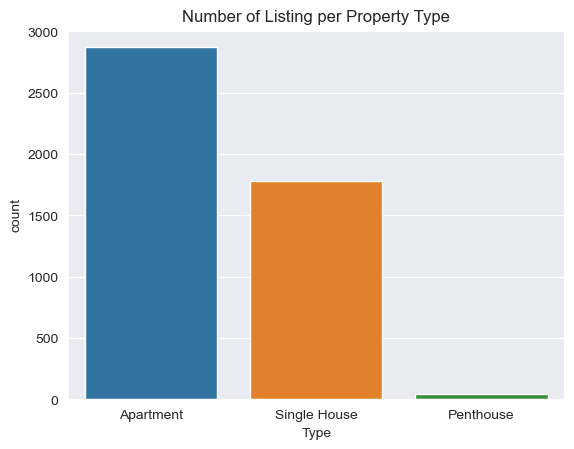

In [20]:
#Exploring Housing Type

snsplot= sns.countplot(x='Type', data= data)
snsplot.set_title('Number of Listing per Property Type')
plt.show()

In [177]:
data['Type'].value_counts()

Apartment       2870
Single House    1784
Penthouse         44
Name: Type, dtype: int64

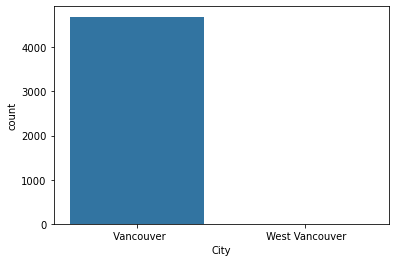

In [178]:
#Exploring City
snsplot= sns.countplot(x='City', data= data)

In [179]:
data['City'].value_counts()

 Vancouver         4694
 West Vancouver       4
Name: City, dtype: int64

Text(0.5, 1.0, 'Histogram of Number of Bedroom')

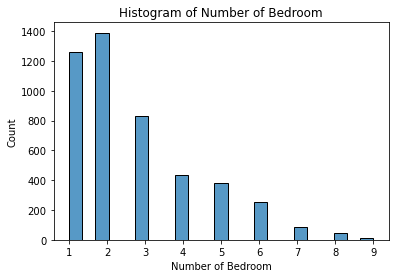

In [180]:
#Show Histogram of Number of Bedroom
snsplot2= sns.histplot(x= 'Number of Bedroom', data= data)
snsplot2.set_title("Histogram of Number of Bedroom")

Text(0.5, 1.0, 'Histogram of Number of Bathroom')

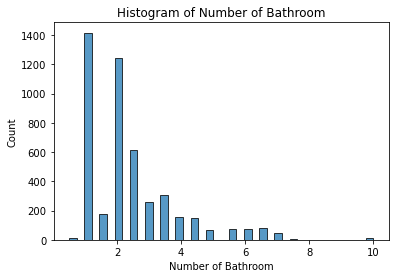

In [181]:
#Show Histogram of Number of Bedroom
snsplot2= sns.histplot(x= 'Number of Bathroom', data= data)
snsplot2.set_title("Histogram of Number of Bathroom")

Text(0.5, 1.0, 'Histogram of Price')

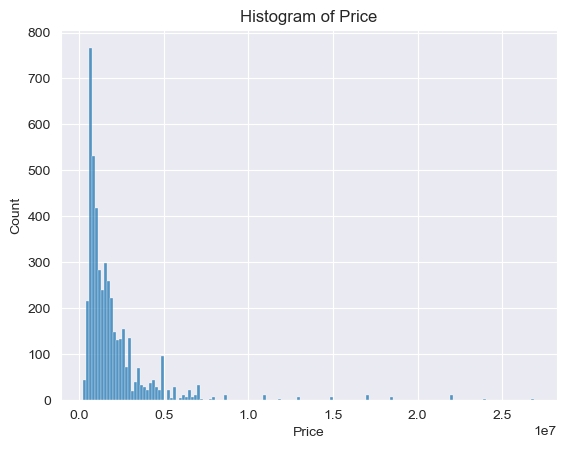

In [21]:
#Show Histogram of Price
snsplot2= sns.histplot(x= 'Price', data= data)
snsplot2.set_title("Histogram of Price")

In [183]:
#Correlation
data.corr()

,Price,Number of Bedroom,Number of Bathroom,Square Ft
Price,1.000000,0.539139,0.665655,0.845765
Number of Bedroom,0.539139,1.000000,0.837770,0.767517
Number of Bathroom,0.665655,0.837770,1.000000,0.838395
Square Ft,0.845765,0.767517,0.838395,1.000000


C:\Users\markm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


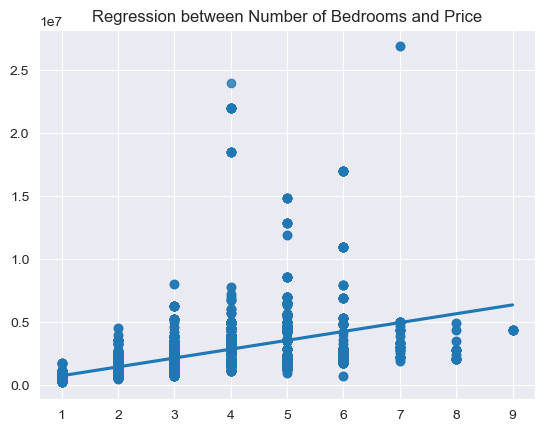

In [23]:
#Regression Graph b/t # of Bedroom and Price
x=data['Number of Bedroom'].tolist()
y=data['Price'].tolist()
a = sns.regplot(x, y, ci=None)
a.set_title("Regression between Number of Bedrooms and Price")
plt.show()

C:\Users\markm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


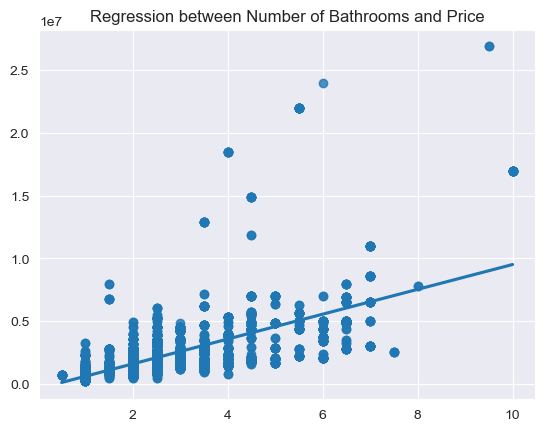

In [25]:
#Regression Graph b/t # of Bathroom and Price
x=data['Number of Bathroom'].tolist()
y=data['Price'].tolist()
b = sns.regplot(x, y, ci=None)
b.set_title("Regression between Number of Bathrooms and Price")
plt.show()

C:\Users\markm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


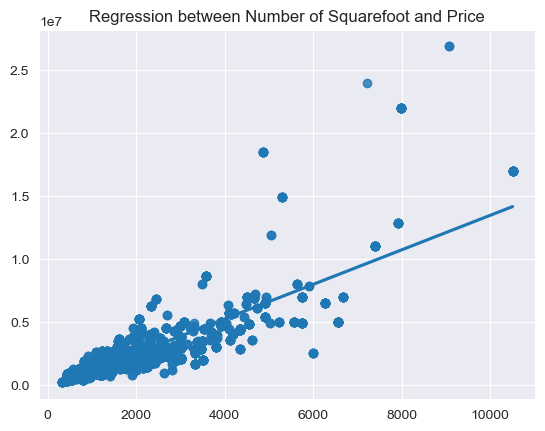

In [6]:
#Regression Graph b/t # of Bathroom and Price
x=data['Square Ft'].tolist()
y=data['Price'].tolist()
c = sns.regplot(x, y, ci=None)
c.set_title("Regression between Number of Squarefoot and Price")
plt.show()

In [191]:
#Which housing type is more expensive compared to others?
x=data['Type'].tolist()
x

['Apartment',
 'Single House',
 'Single House',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Single House',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Penthouse',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',
 'Single House',
 'Single House',
 'Single House',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',

In [193]:
#Which housing type is more expensive compared to others?
x=data['Type'].tolist()
x

['Apartment',
 'Single House',
 'Single House',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Single House',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Penthouse',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',
 'Single House',
 'Single House',
 'Single House',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',
 'Apartment',
 'Apartment',
 'Apartment',
 'Single House',

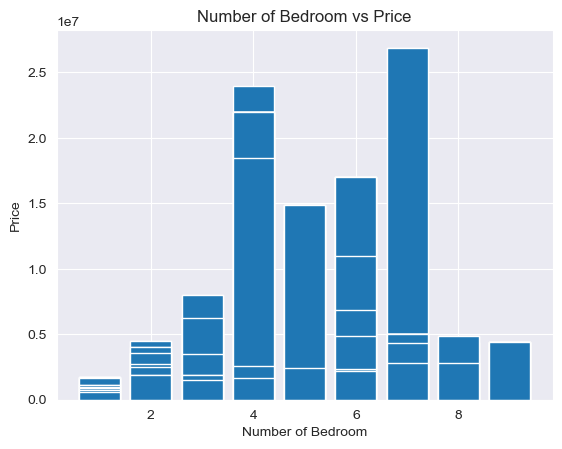

In [7]:
x=data['Number of Bedroom'].tolist()
y=data['Price'].tolist()

plt.bar(x,y)
plt.title('Number of Bedroom vs Price')
plt.xlabel('Number of Bedroom')
plt.ylabel('Price')
plt.show()